## **About Dataset**

 **Synthetic Dataset**
* 3.7 million records in training_extra data
* 3 lac records in training data
* 2 lac records in testing data

A Data Frame with 3.7 million records and 11 variables in training_extra.
* id: A unique identifier for each backpack.
* Brand: The manufacturer or company that produces the backpack.
* Material: The type of fabric or material used (e.g., polyester, leather).
* Size: The overall dimensions or volume of the backpack.
* Compartments: The number of storage sections or pockets in the backpack.
* Laptop_Compartment: Whether the backpack has a separate space for a laptop (Yes/No).
* Waterproof: Indicates if the backpack is water-resistant or waterproof (Yes/No).
* Style: The design category (e.g., casual, travel, hiking, business).
* Color: The primary color of the backpack.
* Weight Capacity (kg): The maximum weight the backpack can carry safely.
* Price: The selling price of the backpack.









## **Table of contents**<a id='toc0_'></a>   

- [Step-01 Install kaggle and download dataset](#toc1_)    
- [Step-02 Import Libraries](#toc2_)    
- [Step-03 Import Dataset BackPack Prediction](#toc3_)    
- [Step-04 Data Preprocessing](#toc4_)    
- [Step-06 Splitting the dataset df into training and testing](#toc5_)    
- [Step-07 Model Selection](#toc6_)    
    - [(I) - Linear Regression](#toc6_1_1_)    
    - [(II) - Bayesian Ridge](#toc6_1_2_)    
    - [(III) - Bayesian Ridge with Hyperparameters Tuning](#toc6_1_3_)    
    - [(IV) - Random Forest Regressor](#toc6_1_4_)    
    - [(V) - Random Forest Regressor with Hyperparameter Tuning](#toc6_1_5_)    
    - [(VI) - Light GBM](#toc6_1_6_)    
    - [(VII) - Light GBM with Hyperparameter Tunning](#toc6_1_7_)    
    - [(VIII) - xgboost](#toc6_1_8_)    
    - [(IX) - Gradient Boosting Regressor](#toc6_1_9_)    
    - [(X) - Gradient Boosting Regressor with Hyperparameter Tunning](#toc6_1_10_)    
- [Step-08 Save & Load Model](#toc7_)    
- [Step-09 Model Prediction](#toc8_)    
- [Step-10 Model Evaluation](#toc9_)    
- [Step-11 Create Dataframe](#toc10_)    
- [Step-12 Data Visualization](#toc11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Step-01 Install kaggle and download dataset](#toc0_)

In [ ]:
pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Competition/backpack_prediction/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
anandshaw2001/netflix-movies-and-tv-shows                     Netflix Movies and TV Shows                         1MB  2025-01-03 10:33:01          14626        383  1.0              
asinow/car-price-dataset                                      Car Price Dataset                                 135KB  2025-01-26 19:53:28           4087         55  1.0              
wlwwwlw/elite-sports-cars-in-data                             Elite Sports Cars in Data                         289KB  2025-02-02 21:23:19            817         22  1.0              
ankushpanday1/thyroid-cancer-risk-prediction-dataset          Thyroid Cancer Ris

In [ ]:
!kaggle competitions download -c playground-series-s5e2


 97% 90.0M/92.7M [00:05<00:00, 23.5MB/s]
100% 92.7M/92.7M [00:05<00:00, 18.8MB/s]


In [ ]:
!unzip playground-series-s5e2.zip -d /content/drive/MyDrive/Competition/backpack_prediction/playground-series-s5e2


Archive:  playground-series-s5e2.zip
  inflating: /content/drive/MyDrive/Competition/backpack_prediction/playground-series-s5e2/sample_submission.csv  
  inflating: /content/drive/MyDrive/Competition/backpack_prediction/playground-series-s5e2/test.csv  
  inflating: /content/drive/MyDrive/Competition/backpack_prediction/playground-series-s5e2/train.csv  
  inflating: /content/drive/MyDrive/Competition/backpack_prediction/playground-series-s5e2/training_extra.csv  


In [ ]:
!ls

drive  playground-series-s5e2.zip  sample_data


In [ ]:
pip install pycaret

# <a id='toc2_'></a>[Step-02 Import Libraries](#toc0_)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#from pycaret.regression import *

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

from tensorflow import keras

import joblib

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# pip install optuna


# <a id='toc3_'></a>[Step-03 Import Dataset BackPack Prediction](#toc0_)

In [3]:
df = pd.read_csv("./playground-series-s5e2/training_extra.csv")
display(df.head())
print("Shape of Training extra:",df.shape)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


Shape of Training extra: (3694318, 11)


In [4]:
df_train = pd.read_csv("./playground-series-s5e2/train.csv")
display(df_train.head())
print("Shape of Train:",df_train.shape)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


Shape of Train: (300000, 11)


In [5]:
df_test = pd.read_csv("./playground-series-s5e2/test.csv")
display(df_test.head())
print("Shape of Test:",df_test.shape)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


Shape of Test: (200000, 10)


# <a id='toc4_'></a>[Step-04 Data Preprocessing](#toc0_)

In [6]:
df.isnull().sum()

id                           0
Brand                   117053
Material                102615
Size                     81190
Compartments                 0
Laptop Compartment       91089
Waterproof               87274
Style                    96210
Color                   123667
Weight Capacity (kg)      1670
Price                        0
dtype: int64

In [7]:
df['Brand'] = df['Brand'].fillna(df['Brand'].mode()[0])

In [8]:
df['Material'] = df['Material'].fillna(df['Material'].mode()[0])
df['Size'] = df['Size'].fillna(df['Size'].mode()[0])
df['Laptop Compartment'] = df['Laptop Compartment'].fillna(df['Laptop Compartment'].mode()[0])
df['Waterproof'] = df['Waterproof'].fillna(df['Waterproof'].mode()[0])
df['Style'] = df['Style'].fillna(df['Style'].mode()[0])
df['Color'] = df['Color'].fillna(df['Color'].mode()[0])
df['Weight Capacity (kg)'] = df['Weight Capacity (kg)'].fillna(df['Weight Capacity (kg)'].mean())

In [9]:
df_train.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [10]:
df_train.isnull().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [11]:
df_train['Brand'] = df_train['Brand'].fillna(df['Brand'].mode()[0])
df_train['Material'] = df_train['Material'].fillna(df['Material'].mode()[0])
df_train['Size'] = df_train['Size'].fillna(df['Size'].mode()[0])
df_train['Laptop Compartment'] = df_train['Laptop Compartment'].fillna(df['Laptop Compartment'].mode()[0])
df_train['Waterproof'] = df_train['Waterproof'].fillna(df['Waterproof'].mode()[0])
df_train['Style'] = df_train['Style'].fillna(df['Style'].mode()[0])
df_train['Color'] = df_train['Color'].fillna(df['Color'].mode()[0])
df_train['Weight Capacity (kg)'] = df_train['Weight Capacity (kg)'].fillna(df['Weight Capacity (kg)'].mean())

In [12]:
df_test.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [13]:
df_test.isnull().sum()

id                         0
Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64

In [14]:
df_test['Brand'] = df_test['Brand'].fillna(df['Brand'].mode()[0])
df_test['Material'] = df_test['Material'].fillna(df['Material'].mode()[0])
df_test['Size'] = df_test['Size'].fillna(df['Size'].mode()[0])
df_test['Laptop Compartment'] = df_test['Laptop Compartment'].fillna(df['Laptop Compartment'].mode()[0])
df_test['Waterproof'] = df_test['Waterproof'].fillna(df['Waterproof'].mode()[0])
df_test['Style'] = df_test['Style'].fillna(df['Style'].mode()[0])
df_test['Color'] = df_test['Color'].fillna(df['Color'].mode()[0])
df_test['Weight Capacity (kg)'] = df_test['Weight Capacity (kg)'].fillna(df['Weight Capacity (kg)'].mean())

In [15]:
df.dtypes

id                        int64
Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object

In [16]:
df.isnull().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

In [17]:
df['Brand'].value_counts()

Brand
Under Armour    858096
Adidas          736923
Nike            707071
Puma            698964
Jansport        693264
Name: count, dtype: int64

In [18]:
df['Material'].value_counts()

Material
Polyester    1083867
Leather       902770
Nylon         872053
Canvas        835628
Name: count, dtype: int64

In [19]:
df['Size'].value_counts()

Size
Medium    1333771
Large     1213652
Small     1146895
Name: count, dtype: int64

In [20]:
df['Laptop Compartment'].value_counts()

Laptop Compartment
Yes    1915684
No     1778634
Name: count, dtype: int64

In [21]:
df['Compartments'].value_counts()

Compartments
1.0     392009
4.0     385748
2.0     377555
3.0     376503
7.0     370666
5.0     369459
9.0     368227
10.0    366488
8.0     354263
6.0     333400
Name: count, dtype: int64

In [22]:
df['Style'].value_counts()

Style
Messenger    1325856
Tote         1200504
Backpack     1167958
Name: count, dtype: int64

In [23]:
df['Color'].value_counts()

Color
Pink     760234
Gray     615830
Blue     590388
Red      582996
Black    574232
Green    570638
Name: count, dtype: int64

In [24]:
df['Compartments'].value_counts()

Compartments
1.0     392009
4.0     385748
2.0     377555
3.0     376503
7.0     370666
5.0     369459
9.0     368227
10.0    366488
8.0     354263
6.0     333400
Name: count, dtype: int64

* **Let's encode categorical variables**

In [25]:
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


In [26]:
df['Brand'] = df['Brand'].astype('category').cat.codes
df['Material'] = df['Material'].astype('category').cat.codes
df['Size'] = df['Size'].astype('category').cat.codes
df['Laptop Compartment']= df['Laptop Compartment'].astype('category').cat.codes
df['Waterproof'] = df['Waterproof'].astype('category').cat.codes
df['Style'] = df['Style'].astype('category').cat.codes
df['Color'] = df['Color'].astype('category').cat.codes

In [27]:
df_train['Brand'] = df_train['Brand'].astype('category').cat.codes
df_train['Material'] = df_train['Material'].astype('category').cat.codes
df_train['Size'] = df_train['Size'].astype('category').cat.codes
df_train['Laptop Compartment']= df_train['Laptop Compartment'].astype('category').cat.codes
df_train['Waterproof'] = df_train['Waterproof'].astype('category').cat.codes
df_train['Style'] = df_train['Style'].astype('category').cat.codes
df_train['Color'] = df_train['Color'].astype('category').cat.codes

In [28]:
df_test['Brand'] = df_test['Brand'].astype('category').cat.codes
df_test['Material'] = df_test['Material'].astype('category').cat.codes
df_test['Size'] = df_test['Size'].astype('category').cat.codes
df_test['Laptop Compartment']= df_test['Laptop Compartment'].astype('category').cat.codes
df_test['Waterproof'] = df_test['Waterproof'].astype('category').cat.codes
df_test['Style'] = df_test['Style'].astype('category').cat.codes
df_test['Color'] = df_test['Color'].astype('category').cat.codes

In [29]:
df.dtypes

id                        int64
Brand                      int8
Material                   int8
Size                       int8
Compartments            float64
Laptop Compartment         int8
Waterproof                 int8
Style                      int8
Color                      int8
Weight Capacity (kg)    float64
Price                   float64
dtype: object

In [30]:
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,4,0,2,10.0,1,1,2,1,23.882052,114.11068
1,500001,3,3,2,4.0,0,1,0,3,11.869095,129.74972
2,500002,1,3,2,8.0,1,1,2,5,8.092302,21.37370
3,500003,2,2,0,7.0,0,0,1,4,7.719581,48.09209
4,500004,2,1,0,9.0,0,1,2,3,22.741826,77.32461


* **Let's check outliers**

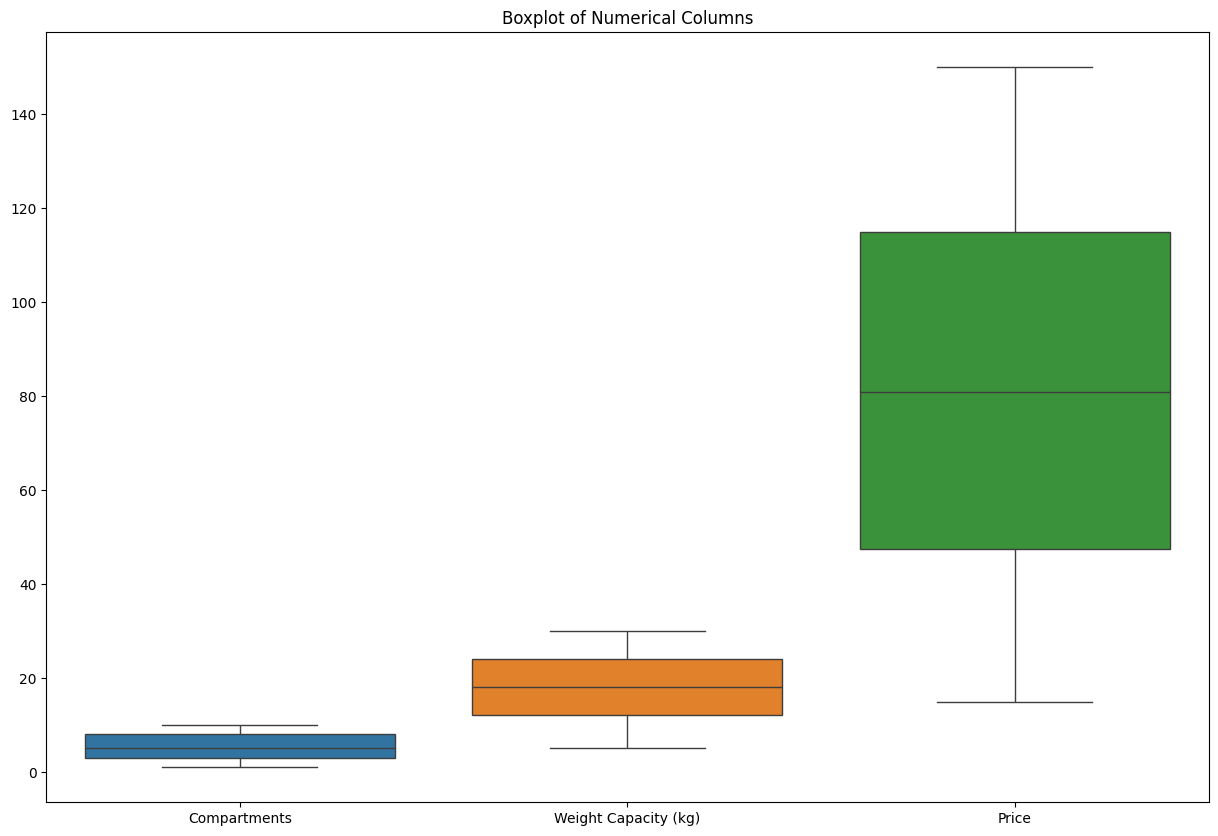

In [34]:
# Plot boxplots for each numerical column in the dataset
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['Compartments', 'Weight Capacity (kg)', 'Price']])
plt.title('Boxplot of Numerical Columns')
plt.show()

# <a id='toc5_'></a>[Step-06 Splitting the dataset df into training and testing](#toc0_)

In [35]:
#train,test = train_test_split(df,test_size=0.2,random_state=42)
df2_train = df_train.head(2000)

In [36]:
scaler = StandardScaler()
X = df_train.drop('Price',axis=1)
y = df_train['Price']

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))
#X_train,y_train,X_test,y_test = train_test_split(X,y)

# <a id='toc6_'></a>[Step-07 Model Selection](#toc0_)

In [ ]:
df_train.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,1,1,1,7.0,1,0,2,0,11.611723,112.15875
1,1,1,0,2,10.0,1,1,1,3,27.078537,68.88056
2,2,4,1,2,2.0,1,0,1,5,16.643760,39.17320
3,3,2,2,2,8.0,1,0,1,3,12.937220,80.60793
4,4,0,0,1,1.0,1,1,1,3,17.749338,86.02312


In [ ]:
# # Rigde Regression and Lasso Regression to overcome overfitting
# ridge = Ridge(alpha=1.0)
# ridge.fit(X,y)
# y_pred_ridge = ridge.predict(df_test)

# lasso = Lasso(alpha=1.0)
# lasso.fit(X,y)
# y_pred_lasso = lasso.predict(df_test)


In [ ]:
# RMSE_ridge = root_mean_squared_error(df_train['Price'],y_pred_ridge)
# r_sq_ridge= r2_score(df_train['Price'],y_pred_ridge)
 
# print("")
# print("----Ridge Regularization-----")
# print(f"RMSE:{RMSE_ridge}")
# print(f"R_Square:{r_sq_ridge}")

# RMSE_lasso = root_mean_squared_error(df_train['Price'],y_pred_ridge)
# r_sq_lasso= r2_score(df_train['Price'],y_pred_lasso)
 
# print("")
# print("----Lasso Regularization-----")
# print(f"RMSE:{RMSE_lasso}")
# print(f"R_Square:{r_sq_lasso}")


----Ridge Regularization-----
RMSE:39.010959241346605
R_Square:-0.0007072191244179571

----Lasso Regularization-----
RMSE:39.010959241346605
R_Square:-0.00044361753069521725


### <a id='toc6_1_1_'></a>[(I) - Linear Regression](#toc0_)

In [164]:
model = LinearRegression()
model.fit(df_train.drop('Price', axis = 1), df_train['Price'])

LinearRegression()

### <a id='toc6_1_2_'></a>[(II) - Bayesian Ridge](#toc0_)

In [ ]:
model_br = BayesianRidge()
model_br.fit(df_train.drop('Price', axis = 1), df_train['Price'])

BayesianRidge()

### <a id='toc6_1_3_'></a>[(III) - Bayesian Ridge with Hyperparameters Tuning](#toc0_)

In [36]:
model_br_hp = BayesianRidge()

# Hyperparameter grid to search
param_grid = {
    'alpha_1':  [1e-6, 1e-5, 1e-4],
    'alpha_2':  [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4],
    'n_iter':   [100, 300, 500]  # how many iterations to run
}


In [37]:
grid_search_br = GridSearchCV(
    estimator=model_br_hp,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [38]:
# Fit the GridsearchCV object on the training data
grid_search_br.fit(df_train.drop('Price', axis = 1), df_train['Price'])

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\Sobia Alamgir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


GridSearchCV(cv=5, estimator=BayesianRidge(), n_jobs=-1,
             param_grid={'alpha_1': [1e-06, 1e-05, 0.0001],
                         'alpha_2': [1e-06, 1e-05, 0.0001],
                         'lambda_1': [1e-06, 1e-05, 0.0001],
                         'lambda_2': [1e-06, 1e-05, 0.0001],
                         'n_iter': [100, 300, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [40]:
# Get the best hyperparameter
best_params_br = grid_search_br.best_params_
display(best_params_br)

{'alpha_1': 0.0001,
 'alpha_2': 1e-06,
 'lambda_1': 1e-06,
 'lambda_2': 0.0001,
 'n_iter': 100}

In [41]:
model_bayesian_hp = BayesianRidge(
    alpha_1= 0.0001,
    alpha_2= 1e-06,
    lambda_1= 1e-06,
    lambda_2= 0.0001,
    n_iter= 100
 )
print(model_bayesian_hp.get_params())

{'alpha_1': 0.0001, 'alpha_2': 1e-06, 'alpha_init': None, 'compute_score': False, 'copy_X': True, 'fit_intercept': True, 'lambda_1': 1e-06, 'lambda_2': 0.0001, 'lambda_init': None, 'max_iter': None, 'n_iter': 100, 'tol': 0.001, 'verbose': False}


In [ ]:
model_bayesian_hp.fit(df_train.drop('Price', axis = 1), df_train['Price'])

c:\Users\Sobia Alamgir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


BayesianRidge(alpha_1=0.0001, lambda_2=0.0001, n_iter=100)

### <a id='toc6_1_4_'></a>[(IV) - Random Forest Regressor](#toc0_)

In [ ]:
model_rfr = RandomForestRegressor()
model_rfr.fit(df_train.drop('Price', axis = 1), df_train['Price'])

RandomForestRegressor()

### <a id='toc6_1_5_'></a>[(V) - Random Forest Regressor with Hyperparameter Tuning](#toc0_)

In [44]:
# Hyperparameter grid to search
param_grid = {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt', 'log2']
             }

In [45]:
grid_search = GridSearchCV(
    estimator= model_rfr,
    param_grid = param_grid,
    cv = 5,
    scoring ='r2',
    n_jobs= -1
)

In [46]:
# Fit the GridsearchCV object on the training data
grid_search.fit(df_train.drop('Price', axis = 1), df_train['Price'])

c:\Users\Sobia Alamgir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
338 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Sobia Alamgir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Sobia Alamgir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Sobia Alamgir\AppData\Local\Programs\Python\Python3

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [47]:
# Get the best hyperparameter
best_params = grid_search.best_params_
display(best_params)

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [48]:
model_with_hyperparameters = RandomForestRegressor(max_depth = 10, max_features = 'sqrt', n_estimators = 200)
print(model_with_hyperparameters.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
model_with_hyperparameters.fit(df_train.drop('Price', axis = 1), df_train['Price'])

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=200)

### <a id='toc6_1_6_'></a>[(VI) - Light GBM](#toc0_)

In [117]:
model_lightgbm = lgb.LGBMRegressor()
model_lightgbm.fit(df_train.drop('Price', axis = 1), df_train['Price'])

LGBMRegressor()

### <a id='toc6_1_7_'></a>[(VII) - Light GBM with Hyperparameter Tunning](#toc0_)

In [ ]:
model_lgbm_hp = lgb.LGBMRegressor(random_state=42)

param_grid = {
    'num_leaves': [10,18, 31, 63,70,80],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.001,0.01, 0.1],
    'n_estimators': [150,100,40],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search = GridSearchCV(
    estimator=model_lgbm_hp,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # use all CPU resourses
    verbose=1
)

In [51]:
%%time
grid_search.fit(df_train.drop('Price', axis = 1), df_train['Price'])

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 546
[LightGBM] [Info] Number of data points in the train set: 300000, number of used features: 10
[LightGBM] [Info] Start training from score 81.411107
CPU times: total: 1min 14s
Wall time: 26min 35s


GridSearchCV(cv=3, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [-1, 5, 10],
                         'n_estimators': [150, 100, 40],
                         'num_leaves': [10, 18, 31, 63],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [372]:
best_params = grid_search.best_params_
display(best_params)

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': -1,
 'n_estimators': 150,
 'num_leaves': 10,
 'subsample': 0.8}

In [112]:
model_lightgbm_hp = lgb.LGBMRegressor(
    colsample_bytree = 0.5, #0.8,
    learning_rate= 0.00001,
    max_depth = -1,
    n_estimators = 40,#100, #80
    num_leaves = 127, #5, #31
    subsample = 0.8,
    feature_fraction = 0.5,
    max_cat_threshold = 16,

    objective='regression',
    #reg_alpha=0.5,                 # L1 regularization
    #reg_lambda=0.5,                # L2 regularization
    # n_jobs=-1,                     # Use all CPU cores
    random_state=42,
     #early_stopping_rounds=50,      # Stop if no improvement after 50 rounds
    verbose=-1  
 )

display(model_lightgbm_hp.get_params())

model_lightgbm_hp.fit(df_train.drop('Price', axis = 1), df_train['Price'])

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.5,
 'importance_type': 'split',
 'learning_rate': 1e-05,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'num_leaves': 127,
 'objective': 'regression',
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 0.8,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'feature_fraction': 0.5,
 'max_cat_threshold': 16,
 'verbose': -1}

LGBMRegressor(colsample_bytree=0.5, feature_fraction=0.5, learning_rate=1e-05,
              max_cat_threshold=16, n_estimators=40, num_leaves=127,
              objective='regression', random_state=42, subsample=0.8,
              verbose=-1)

### <a id='toc6_1_8_'></a>[(VIII) - xgboost](#toc0_)

In [ ]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(df_train.drop('Price', axis = 1), df_train['Price'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### <a id='toc6_1_9_'></a>[(IX) - Gradient Boosting Regressor](#toc0_)

In [ ]:
model_gb = GradientBoostingRegressor()
model_gb.fit(df_train.drop('Price', axis = 1), df_train['Price'])

GradientBoostingRegressor()

### <a id='toc6_1_10_'></a>[(X) - Gradient Boosting Regressor with Hyperparameter Tunning](#toc0_)

In [ ]:
model_gb_hp = GradientBoostingRegressor(n_estimators=2000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    validation_fraction=0.1,  # For early stopping
    n_iter_no_change=50,      # Stop after 50 rounds without improvement
    tol=1e-4                  # Tolerance for early stopping
)

model_gb_hp.fit(df_train.drop('Price', axis = 1), df_train['Price'])



GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='sqrt',
                          min_samples_leaf=2, min_samples_split=4,
                          n_estimators=2000, n_iter_no_change=50,
                          random_state=42, subsample=0.8)

# <a id='toc7_'></a>[Step-08 Save & Load Model](#toc0_)

* **Let's save the model**

In [165]:
import joblib
joblib.dump(model , 'backpack_lr.pkl')
joblib.dump(model_br,'backpack_br.pkl')
joblib.dump(model_rfr,'backpack_rfr.pkl')
joblib.dump(model_with_hyperparameters,'backpack_rfr_hp.pkl')


['backpack_rfr_hp.pkl']

In [166]:
joblib.dump(model_bayesian_hp,'backpack_br_hp.pkl')
joblib.dump(model_lightgbm,'backpack_lightgbm.pkl')
joblib.dump(model_lightgbm_hp,'backpack_lightgbm_hp.pkl')
joblib.dump(model_xgb,'backpack_xgb.pkl')
joblib.dump(model_gb,'backpack_gb.pkl')
joblib.dump(model_gb_hp,'backpack_gb_hp.pkl')

['backpack_gb_hp.pkl']

* **Let's load the model**

In [167]:
model_lr = joblib.load('backpack_lr.pkl')
model_br = joblib.load('backpack_br.pkl')
model_rfr = joblib.load('backpack_rfr.pkl')
model_rfr_hp = joblib.load('backpack_rfr_hp.pkl')
model_br_hp = joblib.load('backpack_br_hp.pkl')
model_lightgbm = joblib.load('backpack_lightgbm.pkl')
model_lightgbm_hp = joblib.load('backpack_lightgbm_hp.pkl')
model_xgb = joblib.load('backpack_xgb.pkl')
model_gb = joblib.load('backpack_gb.pkl')
model_gb_hp = joblib.load('backpack_gb_hp.pkl')

# <a id='toc8_'></a>[Step-09 Model Prediction](#toc0_)

In [168]:
y_pred = model_lr.predict(df_test)
y_pred_br=model_br.predict(df_test)
y_pred_rfr = model_rfr.predict(df_test)
y_pred_rfr_hp = model_rfr_hp.predict(df_test)
y_pred_br_hp = model_br_hp.predict(df_test)
y_pred_lightgbm = model_lightgbm.predict(df_test)
y_pred_lightgbm_hp = model_lightgbm_hp.predict(df_test)
y_pred_xgb = model_xgb.predict(df_test)
y_pred_gb = model_gb.predict(df_test)
y_pred_gb_hp = model_gb_hp.predict(df_test)

# <a id='toc9_'></a>[Step-10 Model Evaluation](#toc0_)

In [43]:
df_train = df_train.head(200000)

In [44]:
len(df_test),len(df_train)

(200000, 200000)

In [171]:
RMSE = root_mean_squared_error(df_train['Price'],y_pred)
r_square = r2_score(df_train['Price'],y_pred)

print("----Linear Regression----")
print(f"RMSE:{RMSE}")
print(f"R_Square:{r_square}")

RMSE_br = root_mean_squared_error(df_train['Price'],y_pred_br)
r_sq_br = r2_score(df_train['Price'],y_pred_br)

print("")
print("----Bayesian Ridge-----")
print(f"RMSE:{RMSE_br}")
print(f"R_Square:{r_sq_br}")

RMSE_br_hp = root_mean_squared_error(df_train['Price'],y_pred_br_hp)
r_sq_br_hp = r2_score(df_train['Price'],y_pred_br_hp)

print("")
print("----Bayesian Ridge with Hyperparameters-----")
print(f"RMSE:{RMSE_br_hp}")
print(f"R_Square:{r_sq_br_hp}")


RMSE_rfr = root_mean_squared_error(df_train['Price'],y_pred_rfr)
r_sq_rfr = r2_score(df_train['Price'],y_pred_rfr)

print("")
print("----Random Forest Regressor-----")
print(f"RMSE:{RMSE_rfr}")
print(f"R_Square:{r_sq_rfr}")

RMSE_rfr_hp = root_mean_squared_error(df_train['Price'],y_pred_rfr_hp)
r_sq_rfr_hp = r2_score(df_train['Price'],y_pred_rfr_hp)

print("")
print("----Random Forest Regressor with Hyperparameters-----")
print(f"RMSE:{RMSE_rfr_hp}")
print(f"R_Square:{r_sq_rfr_hp}")


RMSE_xgb = root_mean_squared_error(df_train['Price'],y_pred_xgb)
r_sq_xgb = r2_score(df_train['Price'],y_pred_xgb)

print("")
print("----XGBoost-----")
print(f"RMSE:{RMSE_xgb}")
print(f"R_Square:{r_sq_xgb}")

----Linear Regression----
RMSE:39.01095927033671
R_Square:-0.0007072206117237911

----Bayesian Ridge-----
RMSE:39.00613599214701
R_Square:-0.00045978291636483704

----Bayesian Ridge with Hyperparameters-----
RMSE:39.006139486222544
R_Square:-0.00045996215391874706

----Random Forest Regressor-----
RMSE:39.959221330827326
R_Square:-0.049948041045432934

----Random Forest Regressor with Hyperparameters-----
RMSE:39.139632577980706
R_Square:-0.007319550471934333

----XGBoost-----
RMSE:40.268638381497055
R_Square:-0.06627116290128754


In [ ]:
RMSE_light = root_mean_squared_error(df_train['Price'],y_pred_lightgbm)
r_sq_light = r2_score(df_train['Price'],y_pred_lightgbm)

print("")
print("----Light GBM-----")
print(f"RMSE:{RMSE_light}")
print(f"R_Square:{r_sq_light}")

RMSE_light_hp = root_mean_squared_error(df_train['Price'],y_pred_lightgbm_hp)
r_sq_light_hp = r2_score(df_train['Price'],y_pred_lightgbm_hp)

print("")
print("----Light GBM with Hyperparameters-----")
print(f"RMSE:{RMSE_light_hp}")
print(f"R_Square:{r_sq_light_hp}")

RMSE_gb = root_mean_squared_error(df_train['Price'],y_pred_gb)
r_sq_gb = r2_score(df_train['Price'],y_pred_gb)

print("")
print("----Gradient Boosting-----")
print(f"RMSE:{RMSE_gb}")
print(f"R_Square:{r_sq_gb}")

RMSE_gb_hp = root_mean_squared_error(df_train['Price'],y_pred_gb_hp)
r_sq_gb_hp = r2_score(df_train['Price'],y_pred_gb_hp)
 
print("")
print("----Gradient Boosting with Hyperparameter Tunning-----")
print(f"RMSE:{RMSE_gb_hp}")
print(f"R_Square:{r_sq_gb_hp}")


----Light GBM-----
RMSE:39.490534767194035
R_Square:-0.025462548435798205

----Light GBM with Hyperparameters-----
RMSE:38.997171175378995
R_Square:3.745495502638363e-08

----Gradient Boosting-----
RMSE:41.408148679807226
R_Square:-0.1274710574887088

----Gradient Boosting with Hyperparameter Tunning-----
RMSE:40.17383960710767
R_Square:-0.06125672869819976

----Ridge Regularization-----
RMSE:39.010959241346605
R_Square:-0.0007072191244179571


# Build ANN model

In [86]:
# Step 1: Define the model
n_features = 10

model_ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (n_features,)),      # Faltten the input layer
    #keras.layers.Dense(128,input_shape = (n_features,)),    # input layer
    keras.layers.Dense(128, activation='relu'), # hidden layer
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'), # hidden layer
    keras.layers.Dropout(0.2),  # Dropout layer (20% of neurons will be turned off randomly)
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='linear')   # output layer
])

In [87]:
# Step 2: Compile the model
model_ann.compile(optimizer='adam', 
                  loss ='mse',
                  metrics = ['mse'])

In [ ]:
# Step 3: Train the model
%%time
model_ann.fit(X, y, epochs=150, batch_size=32)

Epoch 1/150
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - loss: 1467507.7500 - mse: 1467507.7500
Epoch 2/150
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 6267.9966 - mse: 6267.9966
Epoch 3/150
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5119.5996 - mse: 5119.5996
Epoch 4/150
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4133.0156 - mse: 4133.0156
Epoch 5/150
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 3345.5828 - mse: 3345.5828
Epoch 6/150
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 2002.0259 - mse: 2002.0259
Epoch 7/150
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1570.8862 - mse: 1570.8862
Epoch 8/150
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1557.4984 - mse: 1557.4984
Epoch 9/150
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1566.4667 - mse: 1566.4667
Epoch 10/150
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1557.3931 - mse: 1557.3931
Epoch 11/150
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1547.9446 - mse: 1

In [77]:
# Save and Load ANN
model_ann.save('backpack_ann.h5')
load_ann = keras.models.load_model('backpack_ann.h5')

TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [89]:
y_pred_ann = model_ann.predict(df_test).reshape(-1)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 6s 892us/step


In [90]:
rmse_ann= root_mean_squared_error(df_train['Price'],y_pred_ann)
r_sq_ann = r2_score(df_train['Price'],y_pred_ann)

print("")
print("----Artificial Neural Network-----")
print(f"RMSE:{rmse_ann}")
print(f"R_Square:{r_sq_ann}")


----Artificial Neural Network-----
RMSE:38.9971949196009
R_Square:-1.1802861028531453e-06


In [84]:
y_pred_ann.ndim

1

# <a id='toc10_'></a>[Step-11 Create Dataframe](#toc0_)

In [ ]:
dataframe = pd.DataFrame({"id":df_test['id'],"Price":y_pred})
display(dataframe.head())

df_br= pd.DataFrame({"id":df_test['id'],"Price":y_pred_br})
df_br_hp= pd.DataFrame({"id":df_test['id'],"Price":y_pred_br_hp})
df_rfr= pd.DataFrame({"id":df_test['id'],"Price":y_pred_rfr})
df_light_hp= pd.DataFrame({"id":df_test['id'],"Price":y_pred_lightgbm_hp})



,id,Price
0,300000,82.395082
1,300001,81.025365
2,300002,80.194761
3,300003,81.725559
4,300004,81.058820


In [85]:
df_ann = pd.DataFrame({"id":df_test['id'],"Price":y_pred_ann})
df_ann.to_csv("submission_ann.csv",index=False)

In [ ]:
dataframe.to_csv("submission_lr.csv",index=False)
df_br.to_csv("submission_br.csv",index=False)
df_rfr.to_csv("submission_rfr.csv",index=False)
df_br_hp.to_csv("submission_br_hp.csv",index=False)
df_light_hp.to_csv("submission_light_hp.csv",index=False)


# <a id='toc11_'></a>[Step-12 Data Visualization](#toc0_)

* Data Visualization is the Graphical Representation of Information and Data.


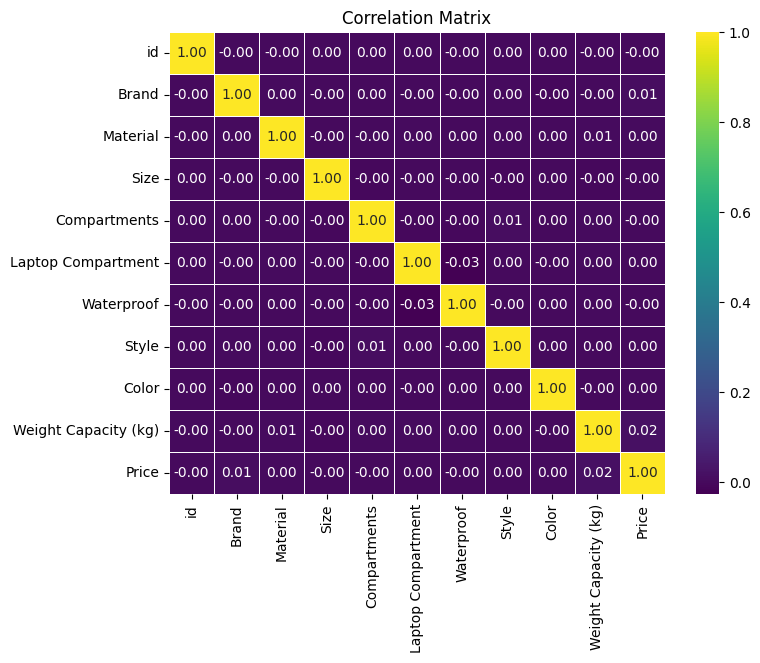

In [42]:
# calculate Correlation matrix
correlation_matrix = df.corr()

# Plot Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True, cmap = 'viridis' , fmt = ".2f" , linewidths= .5)
plt.title("Correlation Matrix")
plt.show()

<Axes: >

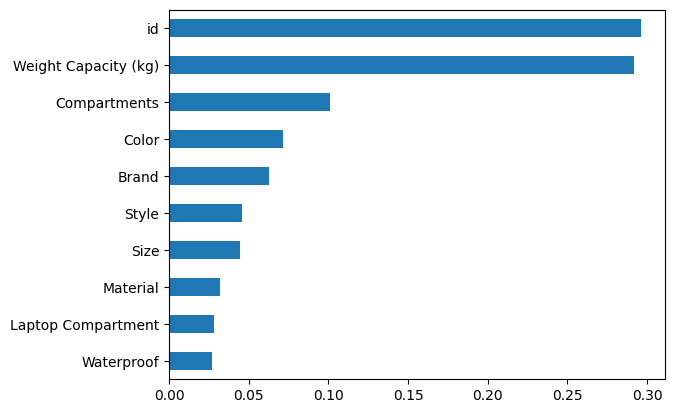

In [344]:
importances = model_rfr.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

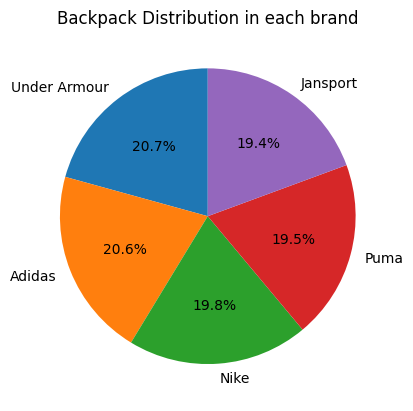

_________________________________
Count of backpack in each Brand
Under Armour    741043
Adidas          736923
Nike            707071
Puma            698964
Jansport        693264
Name: count, dtype: int64
_________________________________


In [190]:
df_pie = pd.read_csv("./playground-series-s5e2/training_extra.csv")
value_count = df_pie['Brand'].value_counts()
plt.pie(value_count,labels=value_count.index,autopct='%1.1f%%',startangle=90)
plt.title("Backpack Distribution in each brand")
plt.show()

print("_________________________________")
print("Count of backpack in each",value_count)
print("_________________________________")

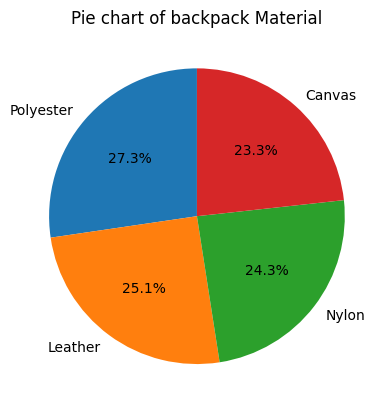

_________________________________
Count of backpack in each Material
Polyester    981252
Leather      902770
Nylon        872053
Canvas       835628
Name: count, dtype: int64
_________________________________


In [192]:
value_count = df_pie['Material'].value_counts()
plt.pie(value_count,labels=value_count.index,autopct='%1.1f%%',startangle=90)
plt.title("Pie chart of backpack Material")
plt.show()

print("_________________________________")
print("Count of backpack in each",value_count)
print("_________________________________")

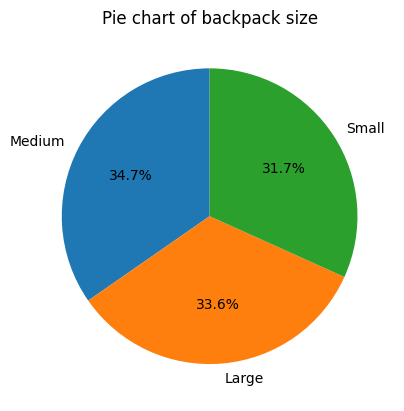

_________________________________
Count of backpack in each Size
Medium    1252581
Large     1213652
Small     1146895
Name: count, dtype: int64
_________________________________


In [191]:
value_count = df_pie['Size'].value_counts()
plt.pie(value_count,labels=value_count.index,autopct='%1.1f%%',startangle=90)
plt.title("Pie chart of backpack size")
plt.show()

print("_________________________________")
print("Count of backpack in each",value_count)
print("_________________________________")

In [369]:
# Count occurrences of each Brand
value_count = df_pie['Brand'].value_counts()
fig = px.pie(names=value_count.index, values=value_count, title="Backpack Distribution using Plotly")

# Show the plot
fig.show()
